In [6]:
!nvidia-smi

Wed May 29 16:23:15 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.85                 Driver Version: 555.85         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   42C    P3             18W /   55W |       0MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
#Importing modules
import numpy as np
import  torch
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch import nn
import torch.optim as optim
import tensorflow as tf

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [9]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [10]:
#Feed forward Neural Network
class FeedForwardNN(nn.Module):
    def __init__(self):
        super(FeedForwardNN, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 10)
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = FeedForwardNN().to(device=device)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0003)


In [11]:
# Training the model
def train(model, train_loader, loss_func, optimizer):
      batch_loss = 0.0
      correct = 0
      total = 0
      model.train()
      for data in train_loader:
          inputs, labels = data
          inputs, labels = inputs.to(device) , labels.to(device)
          optimizer.zero_grad()
          outputs = model(inputs)
          loss = loss_func(outputs, labels)
          loss.backward()
          optimizer.step()

          batch_loss += loss.item()
          predicted_val, predicted_indices = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted_indices == labels).sum().item()

      epoch_loss = batch_loss / total
      epoch_acc = correct / total
      return epoch_loss, epoch_acc

def validate(model, loader, loss_func):
    model.eval()
    batch_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device) , labels.to(device)
            outputs = model(inputs)
            loss = loss_func(outputs, labels)
            batch_loss += loss.item() * inputs.size(0)
            predicted_val, predicted_indices = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted_indices == labels).sum().item()

    epoch_loss = batch_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

In [13]:
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

# Train and validate
num_epochs = 60
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

for epoch in range(num_epochs):
    train_loader = DataLoader(training_data, batch_size=128, shuffle=True)
    train_loss, train_acc = train(model, train_loader, loss_func, optimizer)
    val_loss, val_acc = validate(model, test_loader, loss_func)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

Epoch 1/60, Train Loss: 0.0180, Train Acc: 0.0987, Val Loss: 2.3051, Val Acc: 0.0980
Epoch 2/60, Train Loss: 0.0180, Train Acc: 0.0987, Val Loss: 2.3048, Val Acc: 0.0980
Epoch 3/60, Train Loss: 0.0180, Train Acc: 0.0987, Val Loss: 2.3046, Val Acc: 0.0980
Epoch 4/60, Train Loss: 0.0180, Train Acc: 0.0987, Val Loss: 2.3043, Val Acc: 0.0980
Epoch 5/60, Train Loss: 0.0180, Train Acc: 0.0987, Val Loss: 2.3041, Val Acc: 0.0980
Epoch 6/60, Train Loss: 0.0180, Train Acc: 0.0987, Val Loss: 2.3038, Val Acc: 0.0980
Epoch 7/60, Train Loss: 0.0180, Train Acc: 0.0987, Val Loss: 2.3036, Val Acc: 0.0980
Epoch 8/60, Train Loss: 0.0180, Train Acc: 0.0987, Val Loss: 2.3034, Val Acc: 0.0980
Epoch 9/60, Train Loss: 0.0180, Train Acc: 0.0987, Val Loss: 2.3031, Val Acc: 0.0980
Epoch 10/60, Train Loss: 0.0180, Train Acc: 0.0987, Val Loss: 2.3029, Val Acc: 0.0980
Epoch 11/60, Train Loss: 0.0180, Train Acc: 0.0987, Val Loss: 2.3027, Val Acc: 0.0980
Epoch 12/60, Train Loss: 0.0180, Train Acc: 0.0987, Val Loss: 2

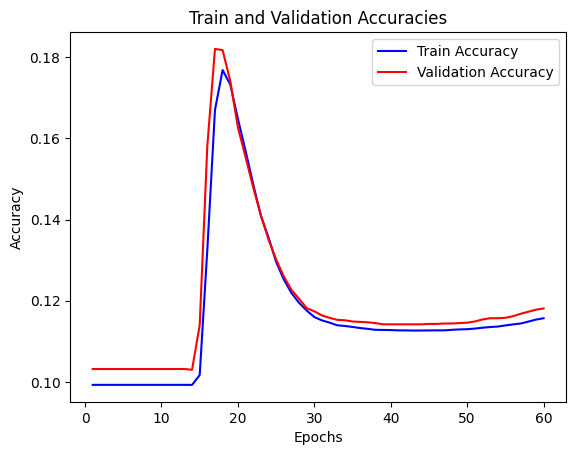

In [ ]:
epochs = range(1, num_epochs + 1)
plt.plot(epochs, train_accuracies, 'b', label='Train Accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation Accuracy')
plt.title('Train and Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()